In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [123]:
df = pd.read_csv(r'D:\Hassan\Back up\University\ANN Project Last\Toyota_Price_Prediction\dataset\automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>>Feature Analyses<h2>

In [124]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [125]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0  

scatterplot of "engine-size" and "price" 

(0.0, 53369.89232141318)

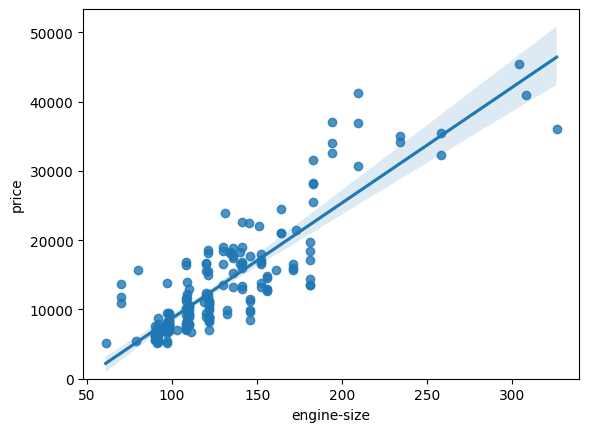

In [126]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [127]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


scatterplot of "Highway mpg " and "price"  

<Axes: xlabel='highway-mpg', ylabel='price'>

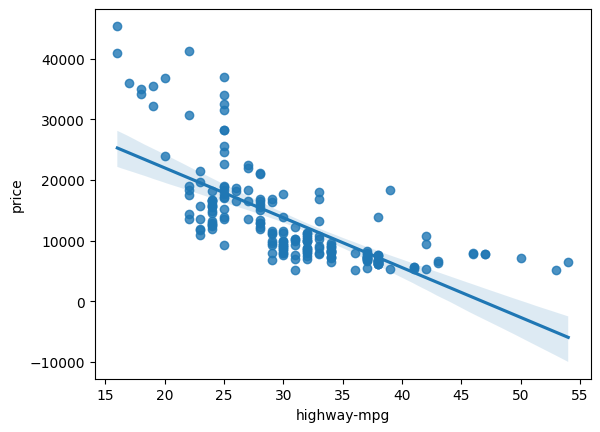

In [128]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [129]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<h3>Wheel-base vs Price</h3>

In [130]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732847e-20


<h3>Horsepower vs Price</h3>

In [131]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259638e-48


<h3>Length vs Price</h3>


In [132]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158899e-30


<h3>Width vs Price</h3>

In [133]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481227e-38


### Curb-weight vs Price

In [134]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893924e-53


<h3>Engine-size vs Price</h3>


In [135]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.26549162219869e-64


<h3>Bore vs Price</h3>

In [136]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935274e-17


<h3>City-mpg vs Price</h3>

In [137]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844679  with a P-value of P =  2.3211320655675065e-29


<h3>Highway-mpg vs Price</h3>

In [138]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144476634e-31


<h4>Conclusion<h4> 
<p>
Strong Positive Correlations with Price:
Horsepower: 0.810
Curb-Weight: 0.834
Engine Size: 0.872
Width: 0.751
Length: 0.691
</b>
<p>
Moderate Positive Correlations with Price:

Wheel-Base: 0.585
Bore: 0.543
</p>
<p>
Negative Correlations with Price:
City-MPG: -0.687
Highway-MPG: -0.705
   
</p>

<h2>Linear Regression</h2>


$$
Yhat = a X + b
$$

In [139]:
lm = LinearRegression()
lm

LinearRegression()

In [140]:
X1 = df[['highway-mpg']]
Y1 = df['price']
lm.fit(X1,Y1)


LinearRegression()

In [141]:
Yhat=lm.predict(X1)
print(Yhat[0:5],"\n"
,"b:",lm.intercept_,"\n"
,"a:",lm.coef_)


[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508] 
 b: 38423.3058581574 
 a: [-821.73337832]


In [142]:
X2 = df[['curb-weight']]
Y2 = df['price']
lm.fit(X2,Y2)

LinearRegression()

In [143]:
Yhat=lm.predict(X2)
print(Yhat[0:5],"\n"
,"b:",lm.intercept_,"\n"
,"a:",lm.coef_)

[13108.85152621 13108.85152621 16634.03445191 10404.07480868
 16646.85329891] 
 b: -19553.570636227465 
 a: [12.818847]


In [144]:
X2 = df[['engine-size']]
Y2 = df['price']
lm.fit(X2,Y2)

LinearRegression()

In [145]:
Yhat=lm.predict(X2)
print(Yhat[0:5],"\n"
,"b:",lm.intercept_,"\n"
,"a:",lm.coef_)

[13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775] 
 b: -7963.338906281024 
 a: [166.86001569]


In [146]:
X2 = df[['engine-size']]
Y2 = df['price']
lm.fit(X2,Y2)

LinearRegression()

In [147]:
Yhat=lm.predict(X2)
print(Yhat[0:5],"\n"
,"b:",lm.intercept_,"\n"
,"a:",lm.coef_)

[13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775] 
 b: -7963.338906281024 
 a: [166.86001569]


In [148]:
X2 = df[['horsepower']]
Y2 = df['price']
lm.fit(X2,Y2)

LinearRegression()

In [149]:
Yhat=lm.predict(X2)
print(Yhat[0:5],"\n"
,"b:",lm.intercept_,"\n"
,"a:",lm.coef_)

[14514.76823442 14514.76823442 21918.64247666 12965.1201372
 15203.50072207] 
 b: -4597.558297892905 
 a: [172.18312191]



<b>Concluded Formulas<b>
<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<b>price</b> = -19553.57 + 12.818847 x  <b>Curb weight</b>

<b>price</b> = -7963.33 + 166.86 x  <b>engine size</b>

<b>price</b> = -4597.55829 + 172.183121 x  <b>Horse Power</b>

<b>But we have another way for multiple factors <b>


<h2>Multiple Linear Regression</h2>

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$



    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>


In [150]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [151]:
lm.fit(Z, df['price'])

LinearRegression()

In [152]:
lm.intercept_

np.float64(-15806.624626329227)

In [153]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

First lets make a prediction 

In [154]:
Y_hat = lm.predict(Z)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_15796\2128340318.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Hassan\AppData\Local\Temp\ipykernel_15796\2128340318.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

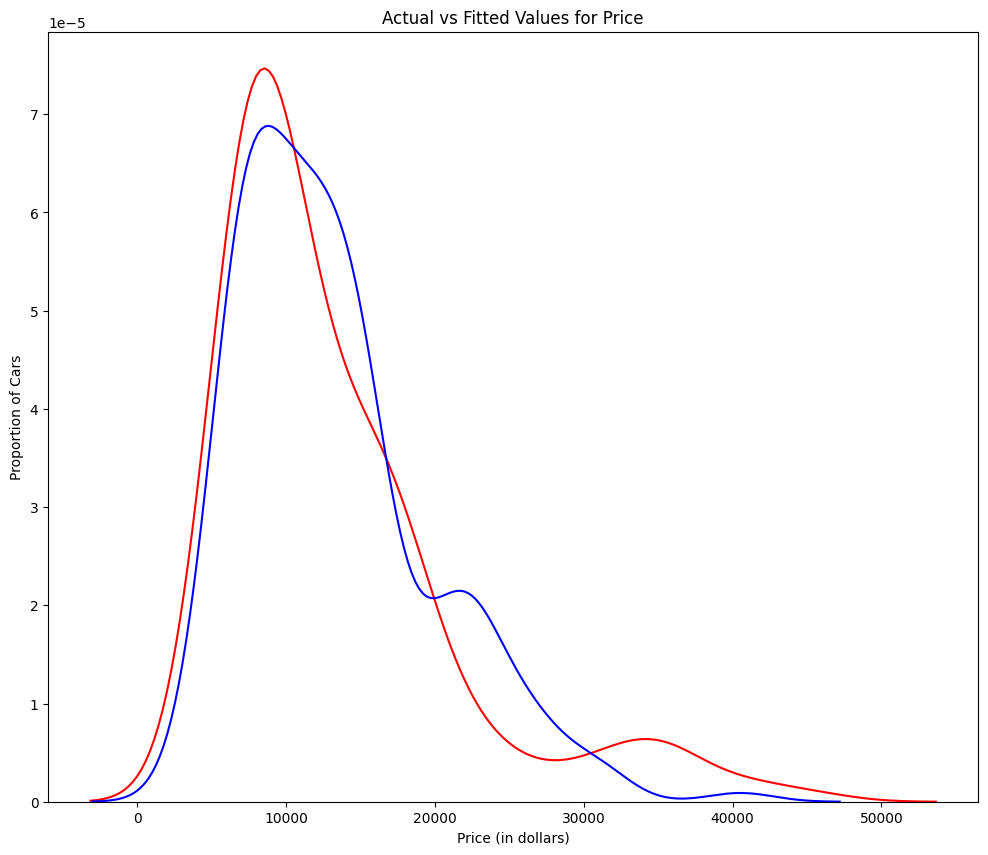

In [155]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>fitted values are reasonably close to the actual values, since the two distributions overlap a bit.</p>

<h2>Polynomial Regression</h2>

<center><b>Quadratic - 2nd order</b></center>

Yhat = a + b_1 X^2 +b_2 X^2 



<center><b>Cubic - 3rd order</b></center>

Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\



<center><b>Higher order</b>:</center>

Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\


In [156]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [157]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [158]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 

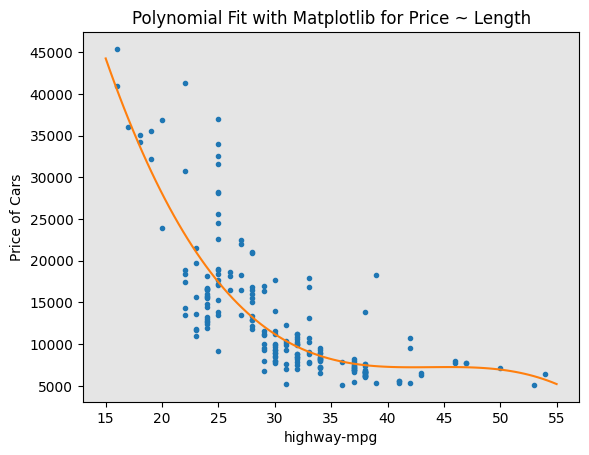

In [159]:
PlotPolly(p, x, y, 'highway-mpg')

<b>PolynomialFeatures</b> object of degree 2: 

In [175]:
pr=PolynomialFeatures(degree=3)
pr

PolynomialFeatures(degree=3)

In [176]:
Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [177]:
Z_pr.shape

(201, 35)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_15796\4073716899.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Hassan\AppData\Local\Temp\ipykernel_15796\4073716899.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

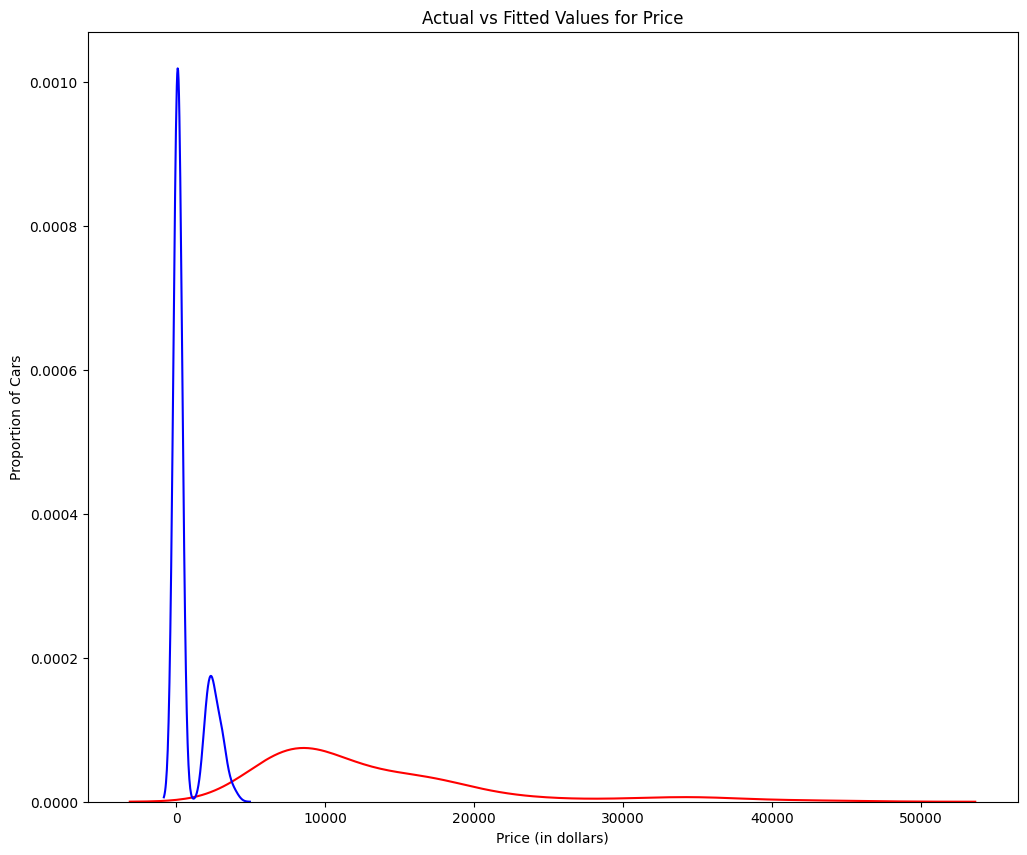

In [181]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Z, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>Pipeline</h2>

In [166]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [167]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [168]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously

In [182]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Measures for In-Sample Evaluation</h2>

 are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    


<h3>Model 1: Simple Linear Regression</h3>

 R^2

In [184]:
#highway_mpg_fit
lm.fit(X1, Y1)
# Find the R^2
print('The R-square is: ', lm.score(X1, Y1))

The R-square is:  0.4965911884339176


 MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [186]:
Yhat=lm.predict(X1)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

 R^2

In [192]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


 MSE

In [200]:
Y_predict_multifit = lm.predict(Z)

In [201]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

R^2

In [203]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<h3>MSE</h3>

In [ ]:
mean_squared_error(df['price'], p(x))

np.float64(20474146.426361207)

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>